# Exploring Stable diffusion Pipeline

> Exploring the stable diffusion pipeline


In [ ]:
#| default_exp StableDiffusionPipeline

In [ ]:
#| hide
from nbdev.showdoc import *
from reinautils import *

In [ ]:
#| hide
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import matplotlib.pylab as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pickle
%load_ext autoreload
%autoreload 2
%matplotlib inline

Load necessary modules

In [ ]:
#| export
from PIL import Image
from tqdm.auto import tqdm
from diffusers import StableDiffusionPipeline
import torch
from xformers.ops import MemoryEfficientAttentionFlashAttentionOp

2023-04-17 20:05:03.294438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 20:05:04.119455: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/opt/conda/lib
2023-04-17 20:05:04.119533: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

Setup the notebook's configuration parameters

In [ ]:
params=Parameters().from_json('../config.json')

In [ ]:
params.gpu = device_by_name("Tesla")
params.height = 512  # default height of Stable Diffusion
params.width = 512  # default width of Stable Diffusion
params.num_inference_steps = 25  # Number of denoising steps
params.guidance_scale = 7.5  # Scale for classifier-free guidance
params.seed = 0

In [ ]:
device=params.gpu

load pretrained model

In [ ]:
params.model_name='stabilityai/stable-diffusion-2-1-base'

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(params.model_name, torch_dtype=torch.float16 , requires_safety_checker = False).to(device)
# pipe.enable_xformers_memory_efficient_attention(attention_op=MemoryEfficientAttentionFlashAttentionOp)
# # Workaround for not accepting attention shape using VAE for Flash Attention
# pipe.vae.enable_xformers_memory_efficient_attention(attention_op=None)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Setup prompt

In [ ]:
prompt = ["a photograph of a cute puppy"]
generator = torch.Generator(device = device)
generator.manual_seed(params.seed)  # Seed generator to create the inital latent noise

<torch._C.Generator>

Run the standard model

  0%|          | 0/50 [00:00<?, ?it/s]

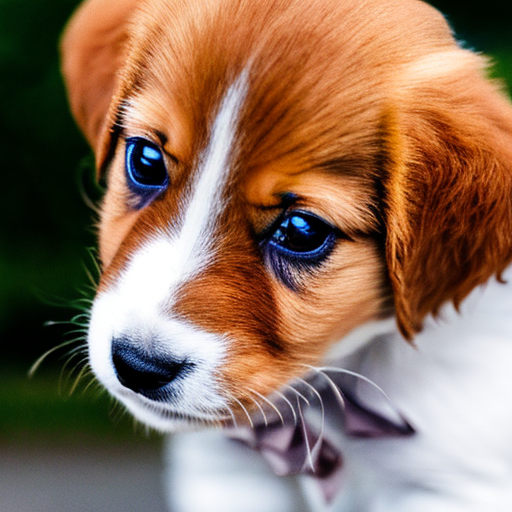

In [ ]:
image = pipe(prompt, generator = generator).images[0]

image

lets try another prompt

  0%|          | 0/50 [00:00<?, ?it/s]

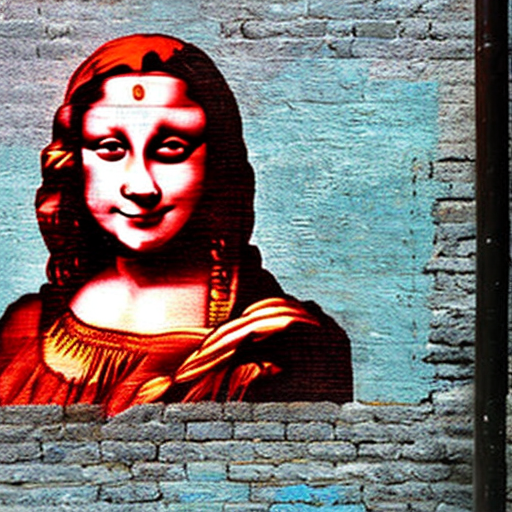

In [ ]:
prompt = ["a graffity of the monalisa on a brick wall, a red gorilla painter"]

image = pipe(prompt, generator = generator).images[0]

image

negative_prompt

  0%|          | 0/50 [00:00<?, ?it/s]

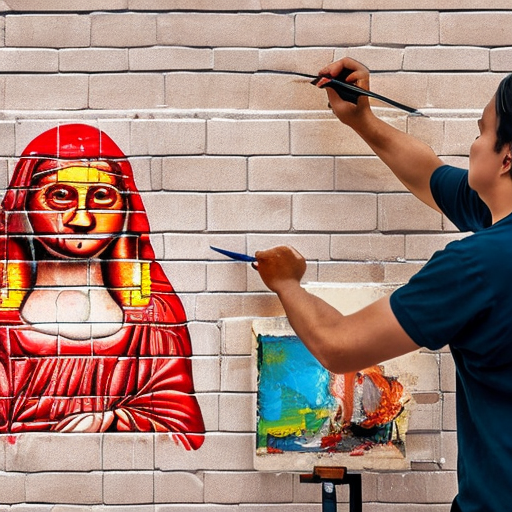

In [ ]:
prompt = ["a red gorilla painter painting a graffity of the monalisa on a brick wall"]
negative_prompt = ["a photo"]

image = pipe(prompt, negative_prompt = negative_prompt, generator = generator).images[0]

image

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()